https://github.com/IDEA-Research/GroundingDINO



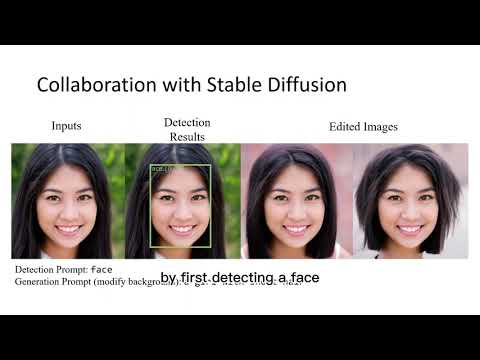

In [1]:
from IPython.display import YouTubeVideo

# Specify the video ID
video_id = "wxWDt5UiwY8"

# Embed the video
YouTubeVideo(video_id)

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks


In [3]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 463 (delta 175), reused 136 (delta 136), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 23.00 MiB/s, done.
Resolving deltas: 100% (241/241), done.
/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks/GroundingDINO


In [4]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [5]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks
/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks/weights


In [6]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks/weights/groundingdino_swint_ogc.pth ; exist: True


In [7]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks
/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks/data


In [8]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks/GroundingDINO


  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <EEB3232B-F6A7-3262-948C-BB2F54905803> /Users/rshankar/anaconda3/envs/cv/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?


final text_encoder_type: bert-base-uncased


In [15]:
import os, torch
import supervision as sv
from groundingdino.util.inference import load_model, load_image, predict, annotate
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Ensure HOME is defined properly
HOME = os.path.expanduser("~")

# Paths and Parameters
IMAGE_NAME = "/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks/data/dog-3.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)
TEXT_PROMPT = "chair"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

# Load model and move to CPU
model = load_model("groundingdino/config/GroundingDINO_SwinT_OGC.py", "/Users/rshankar/Downloads/Projects/new_folder/deep-learning/ml-dl-experiments/notebooks/weights/groundingdino_swint_ogc.pth")
model = model.to('cpu')  # Force the model to run on CPU

# Load image
image_source, image = load_image(IMAGE_PATH)

# Ensure the image tensor is on CPU if required
image = image.to('cpu')# if isinstance(image, torch.Tensor) else image

# Run prediction
boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)

# Annotate image
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# Plot the result
%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))


final text_encoder_type: bert-base-uncased


AssertionError: Torch not compiled with CUDA enabled